In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn import preprocessing

import matplotlib.pyplot as plt

In [ ]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=55bc8fa4a405ab70f8f56e76f997c789fd2bb64fc725f9e2955f3b2e598c647d
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy as fuzz

In [ ]:
df = pd.read_csv('drive/MyDrive/games_1.csv')
df['time_played'] = df.apply(lambda row: (row['lastMoveAt'] - row['createdAt']) / 1000, axis=1)
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,createdAt,lastMoveAt,time_played
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,1504207453368,1504207526048,72.680
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1504127000321,1504127102295,101.974
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,1504126721989,1504126976397,254.408
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,1504107699427,1504108242698,543.271
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,1504027357595,1504028484778,1127.183


array([[<Axes: title={'center': 'turns'}>]], dtype=object)

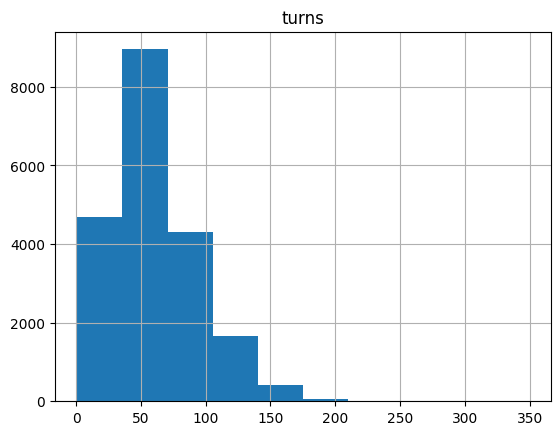

In [ ]:
df.hist(column='turns')

array([[<Axes: title={'center': 'opening_ply'}>]], dtype=object)

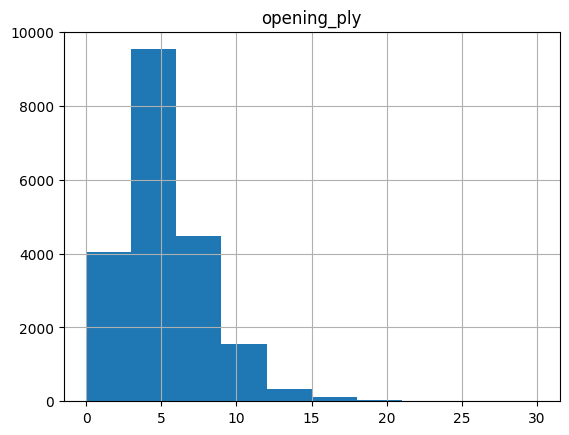

In [ ]:
df.hist(column='opening_ply', range=[0, 30])

<Axes: >

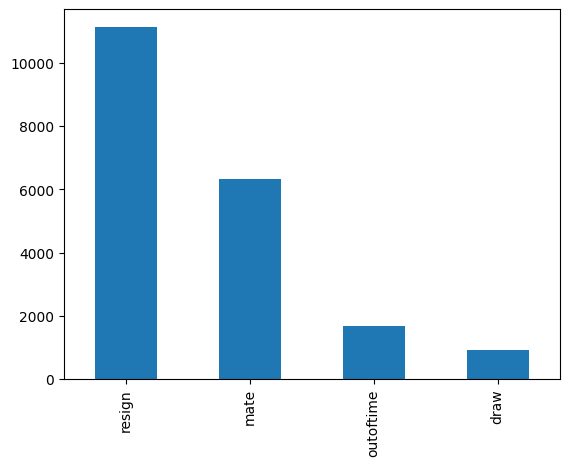

In [ ]:
df['victory_status'].value_counts().plot(kind='bar')

In [ ]:
# Drop unused columns
data =  pd.DataFrame(df)
game_status = data.pop('victory_status')

data.drop(['id', 'increment_code', 'rated', 'winner', 'created_at', 'last_move_at', 'opening_name','white_id', 'black_id', 'moves', 'opening_eco', 'createdAt', 'lastMoveAt'], inplace=True, axis=1)

In [ ]:
data.head()

,turns,white_rating,black_rating,opening_ply,time_played
0,13,1500,1191,5,72.680
1,16,1322,1261,4,101.974
2,61,1496,1500,3,254.408
3,61,1439,1454,3,543.271
4,95,1523,1469,5,1127.183


In [ ]:
values = data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(values)
data_norm = pd.DataFrame(x_scaled, index=data.index, columns=data.columns)

pd.DataFrame(data_norm).describe()

,turns,white_rating,black_rating,opening_ply,time_played
count,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000
mean,0.170879,0.424129,0.413564,0.141370,0.001407
std,0.096467,0.152011,0.150484,0.103598,0.007377
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.103448,0.320459,0.311272,0.074074,0.000606
50%,0.155172,0.408664,0.399690,0.111111,0.001070
75%,0.224138,0.526618,0.514478,0.185185,0.001657
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(data_norm)
crisp_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
n = len(data_norm) #number of data

#number of clusters
k = 4

#dimension of cluster
d = 5

# m parameter
m = 2

#number of iterations
MAX_ITERS = 10

In [ ]:
def initialize_membership_weights():
  return np.random.rand(n, k)

In [ ]:
def compute_centroids(weight_arr):
  centroids = []
  for i in range(k):
    weight_sum = np.power(weight_arr[:,i], m).sum()
    cj = []
    for x in range(d):
      numerator = (data_norm.iloc[:, x].values * np.power(weight_arr[:, i], m)).sum()
      c_val = numerator / weight_sum;
      cj.append(c_val)
    centroids.append(cj)
  return centroids

In [ ]:
def update_weights(weight_arr, centroids):
  denom = np.zeros(n)
  for i in range(k):
    dist = (data_norm.iloc[:,:].values - centroids[i]) ** 2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)
    denom  = denom + np.power(1 / dist, 1 / (m - 1))

  for i in range(k):
    dist = (data_norm.iloc[:,:].values - centroids[i]) ** 2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)
    weight_arr[:,i] = np.divide(np.power(1 / dist, 1 / (m - 1)), denom)
  return weight_arr

In [ ]:
def get_clusters(weight_arr):
    cluster_labels = list()
    for i in range(n):
        index = np.argmax(weight_arr[i])
        cluster_labels.append(index)
    return cluster_labels

In [ ]:
def fuzzy_means():
  weight_arr = initialize_membership_weights()
  plt.figure(figsize=(50,50))
  for z in range(MAX_ITERS):
    c = compute_centroids(weight_arr)
    weight_arr=update_weights(weight_arr, c)

  plt.show()
  print(weight_arr)
  return (weight_arr,c)

In [ ]:
final_weights, centers = fuzzy_means()
fuzzy_labels = get_clusters(final_weights)

<Figure size 5000x5000 with 0 Axes>

[[0.37721274 0.3471639  0.09456091 0.18106245]
 [0.41051769 0.35754358 0.07760647 0.15433226]
 [0.42871802 0.45558428 0.0239405  0.0917572 ]
 ...
 [0.41837664 0.35814409 0.07495354 0.14852573]
 [0.37155958 0.3452762  0.09722056 0.18594365]
 [0.4201607  0.36296118 0.07018878 0.14668934]]


In [ ]:
data_norm.head()

,turns,white_rating,black_rating,opening_ply,time_played
0,0.034483,0.373695,0.207859,0.148148,0.000117
1,0.043103,0.280793,0.244054,0.111111,0.000165
2,0.172414,0.371608,0.367632,0.074074,0.000417
3,0.172414,0.341858,0.343847,0.074074,0.000894
4,0.270115,0.385699,0.351603,0.148148,0.001857


In [ ]:
df_rating = data_norm.iloc[:,1:3]

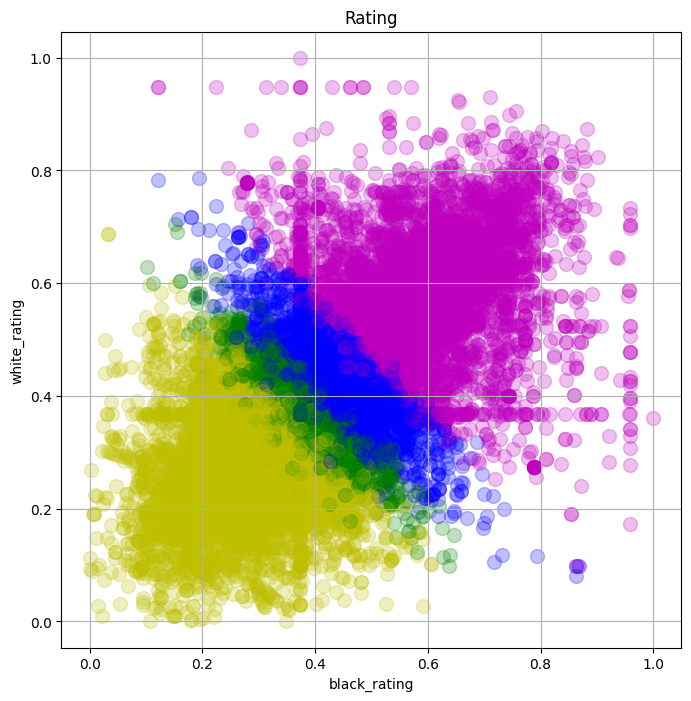

In [ ]:
X = np.zeros((n,1))
plt.figure(0,figsize=(8,8))
plt.axis('equal')
plt.xlabel('black_rating')
plt.ylabel('white_rating')
plt.title('Rating')
plt.grid()
for center in centers:
  plt.scatter(center[1],center[2], marker='D',color='r')
clr = 'b'
for i in range(n):
    cNumber = np.where(final_weights[i] == np.amax(final_weights[i]))
    if cNumber[0][0] == 0:
      clr = 'y'
    elif cNumber[0][0] == 1:
      clr = 'g'
    elif cNumber[0][0] == 2:
      clr = 'm'
    elif cNumber[0][0] == 3:
      clr = 'b'
    plt.scatter(list(df_rating.iloc[i:i+1,0]), list(df_rating.iloc[i:i+1,1]), alpha=0.25,s=100,color=clr)
plt.show()

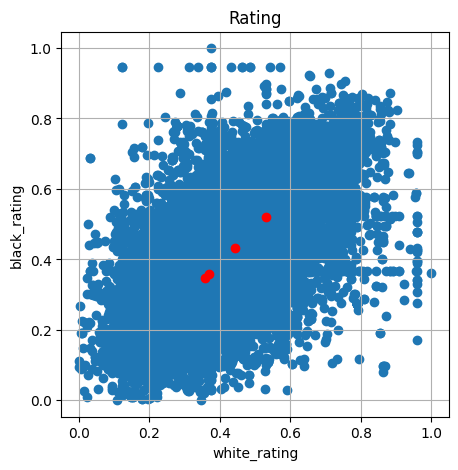

In [ ]:
plt.figure(1,figsize=(5,5))
plt.scatter(list(df_rating.iloc[:,0]), list(df_rating.iloc[:,1]), marker='o')
plt.axis('equal')
plt.xlabel('white_rating')
plt.ylabel('black_rating')
plt.title('Rating')
plt.grid()
for center in centers:
  plt.scatter(center[1],center[2], marker='o',color='r')
plt.show()

In [ ]:
data_labels = pd.DataFrame(data = {'crisp': crisp_labels, 'fuzzy': fuzzy_labels, 'real': game_status})

In [ ]:
num_fuzzy = 0
num_crisp = 0
for cluster in range(k):
    datapoints_assigned_fuzzy = data_labels.loc[data_labels['fuzzy'] == cluster]
    datapoints_assigned_crisp = data_labels.loc[data_labels['crisp'] == cluster]
    num_fuzzy += datapoints_assigned_fuzzy['real'].value_counts()[0]
    num_crisp += datapoints_assigned_crisp['real'].value_counts()[0]

purity_fuzzy = num_fuzzy / n
purity_crisp = num_crisp / n

print('Purity')
print(f'fuzzy clustering: {purity_fuzzy}')
print(f'crisp clustering: {purity_crisp}')

Purity
fuzzy clustering: 0.5557383587595972
crisp clustering: 0.5557383587595972


In [ ]:
nmi_fuzzy = normalized_mutual_info_score(data_labels['fuzzy'], data_labels['real'])
nmi_crisp = normalized_mutual_info_score(data_labels['crisp'], data_labels['real'])

print('NMI')
print(f'fuzzy clustering: {nmi_fuzzy}')
print(f'crisp clustering: {nmi_crisp}')

NMI
fuzzy clustering: 0.011386164127591315
crisp clustering: 0.02508921036238532


In [ ]:
data_features_labels = pd.concat([data_norm, data_labels.set_index(data_norm.index)], axis = 1)
data_features_labels.head()

,turns,white_rating,black_rating,opening_ply,time_played,crisp,fuzzy,real
0,0.034483,0.373695,0.207859,0.148148,0.000117,3,0,outoftime
1,0.043103,0.280793,0.244054,0.111111,0.000165,3,0,resign
2,0.172414,0.371608,0.367632,0.074074,0.000417,1,1,mate
3,0.172414,0.341858,0.343847,0.074074,0.000894,3,0,mate
4,0.270115,0.385699,0.351603,0.148148,0.001857,2,1,mate


In [ ]:
for cluster in range(k):
    c = data_labels.loc[data_labels['fuzzy'] == cluster]
    print(f'Cluster {cluster}:')
    print(c['real'].value_counts())

Cluster 0:
resign       3489
mate         2808
outoftime     517
draw          247
Name: real, dtype: int64
Cluster 1:
resign       1399
mate          883
outoftime     205
draw           96
Name: real, dtype: int64
Cluster 2:
resign       3929
mate         1358
outoftime     603
draw          372
Name: real, dtype: int64
Cluster 3:
resign       2330
mate         1276
outoftime     355
draw          191
Name: real, dtype: int64


Text(0.5, 1.0, 'Time played')

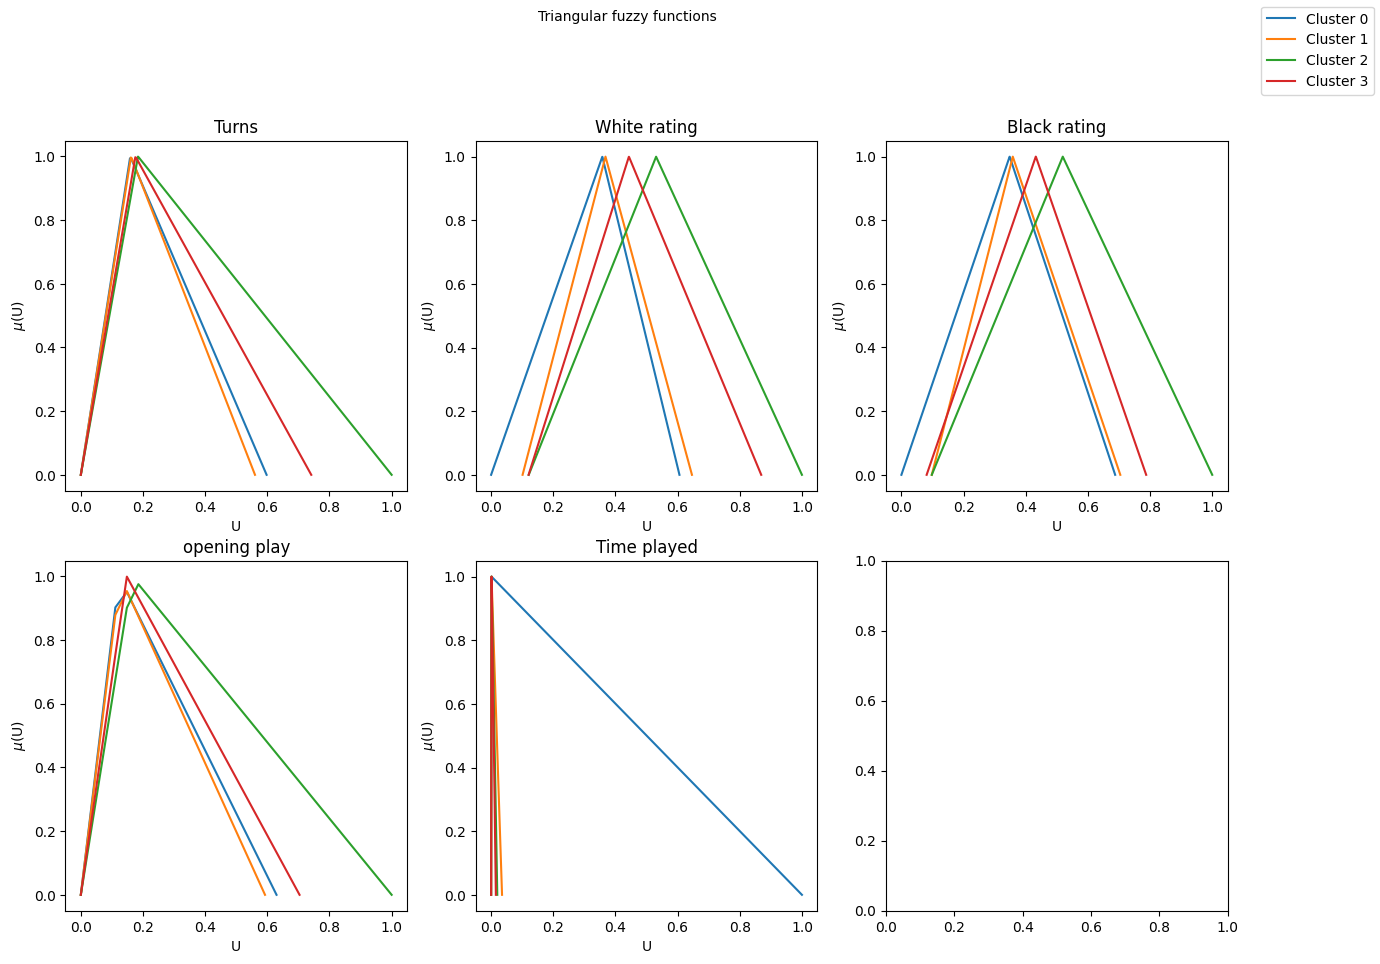

In [ ]:
rows = 2
cols = 3

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize=(15,10))
plt.text(x=0.5, y=1, s='Triangular fuzzy functions',ha="center", transform=fig.transFigure)

plot_num = 0

for index_attr, attr in enumerate(data_norm.columns):
    for cluster in range(k):
        curr_cluster = data_features_labels.loc[data_features_labels['fuzzy'] == cluster]
        x = np.sort(curr_cluster[attr].to_numpy())
        y = fuzz.trimf(x, [curr_cluster[attr].min(), centers[cluster][index_attr], curr_cluster[attr].max()])
        current_plot = ax[plot_num // cols][plot_num % cols]
        current_plot.plot(x, y)
        current_plot.set_xlabel('U')
        current_plot.set_ylabel(r'$\mu$(U)')

    plot_num += 1

fig.legend(labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])

ax[0][0].set_title('Turns')
ax[0][1].set_title('White rating')
ax[0][2].set_title('Black rating')
ax[1][0].set_title('opening play')
ax[1][1].set_title('Time played')